In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import time

from common import *

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import logging

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
with open('SVHN_train.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    train_dataset_56 = tmp_save['dataset']
    train_labels = tmp_save['labels']
    
valid_size = 2000
valid_dataset_56 = train_dataset_56[:valid_size]
valid_labels = train_labels[:valid_size]
train_dataset_56 = train_dataset_56[valid_size:]
train_labels = train_labels[valid_size:]

with open('SVHN_test.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    test_dataset_56 = tmp_save['dataset']
    test_labels = tmp_save['labels']
    
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)   

Training set (31402, 56, 56) (31402,)
Validation set (2000, 56, 56) (2000,)
Test set (13068, 56, 56) (13068,)


In [5]:
num_digits = 3

train_dataset_56, train_labels = max_digits(train_dataset_56, train_labels, num_digits)
valid_dataset_56, valid_labels = max_digits(valid_dataset_56, valid_labels, num_digits)
test_dataset_56, test_labels = max_digits(test_dataset_56, test_labels, num_digits)
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape) 

Training set (30041, 56, 56) (30041,)
Validation set (1917, 56, 56) (1917,)
Test set (12920, 56, 56) (12920,)


Labels [1]
Dtype float32
Shape (56, 56)
Color range -0.511932 0.5


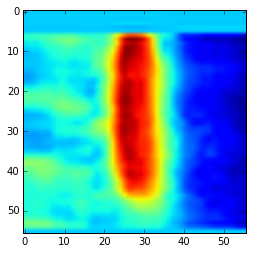

Labels [2 1]
Dtype float32
Shape (56, 56)
Color range -0.499036 0.5


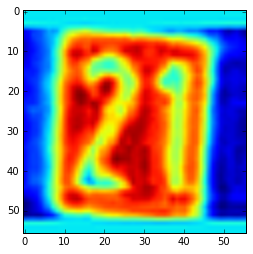

Labels [1 9 7]
Dtype float32
Shape (56, 56)
Color range -0.501402 0.5


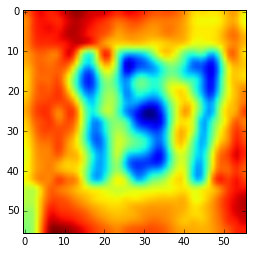

Labels [2 1 0]
Dtype float32
Shape (56, 56)
Color range -0.488881 0.5


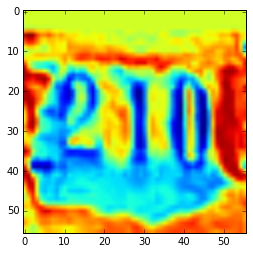

Labels [7 3]
Dtype float32
Shape (56, 56)
Color range -0.500999 0.5


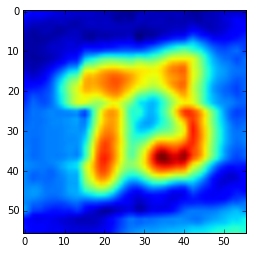

Labels [2 2]
Dtype float32
Shape (56, 56)
Color range -0.499727 0.5


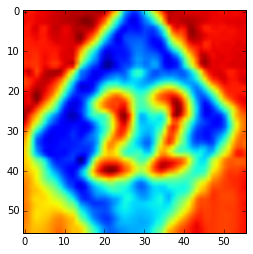

In [6]:
for dataset, labels in [(train_dataset_56, train_labels),
                        (valid_dataset_56, valid_labels),
                        (test_dataset_56, test_labels)]:
    show_images(dataset, labels, 2)

In [7]:
num_labels = 11 # Add an extra character so we can deal with spaces
num_channels = 1 # grayscale

train_dataset_56, train_labels = reformat(num_digits, num_labels, train_dataset_56, train_labels)
valid_dataset_56, valid_labels = reformat(num_digits, num_labels, valid_dataset_56, valid_labels)
test_dataset_56, test_labels = reformat(num_digits, num_labels, test_dataset_56, test_labels)

print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)

Training set (30041, 56, 56, 1) (30041, 3, 11)
Validation set (1917, 56, 56, 1) (1917, 3, 11)
Test set (12920, 56, 56, 1) (12920, 3, 11)


In [8]:
test_dataset_56 = test_dataset_56[:6000]
test_labels = test_labels[:6000]

train_dataset_28 = train_dataset_56[:, ::2, ::2, :]
valid_dataset_28 = valid_dataset_56[:, ::2, ::2, :]
test_dataset_28 = test_dataset_56[:, ::2, ::2, :]
print('Training set', train_dataset_28.shape, train_labels.shape)
print('Validation set', valid_dataset_28.shape, valid_labels.shape)
print('Test set', test_dataset_28.shape, test_labels.shape)

Training set (30041, 28, 28, 1) (30041, 3, 11)
Validation set (1917, 28, 28, 1) (1917, 3, 11)
Test set (6000, 28, 28, 1) (6000, 3, 11)


In [9]:
dataset_56 = (train_dataset_56, valid_dataset_56, test_dataset_56)
dataset_28 = (train_dataset_28, valid_dataset_28, test_dataset_28)

In [ ]:
train_dataset, valid_dataset, test_dataset = dataset_28

def run(graph_config):
    graph = create_graph(num_digits, num_labels, valid_dataset, test_dataset, **graph_config) 
    run_graph(graph, num_digits, train_dataset, train_labels, valid_labels, test_labels, mins=2)
    return graph

In [ ]:
graph = run({})

Initialized
Elapsed time(s):14/120 (0.12%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.885838
Minibatch accuracy: 33.3%
Validation accuracy: 41.1%
Elapsed time(s):31/120 (0.26%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.776230
Minibatch accuracy: 35.4%
Validation accuracy: 44.3%

In [ ]:
graph = run({'use_dropout':True})

In [ ]:
graph = run({'use_dropout':True,
             'learning_rate':0.5})

In [ ]:
graph = run({'use_dropout':True,
             'learning_decay':0.2})

In [ ]:
graph = run({'use_dropout':True,
             'learning_rate':0.5,
             'learning_decay':0.2})

In [ ]:
graph = run({'use_dropout':True,
             'learning_rate':.4})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.5})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.75})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':128})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':32})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':256})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':32})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':8})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':12})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':24})